In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#read in csv and create dataframe
movie_df = pd.read_csv("group_project/Output/no_lie_for_real_left_off_here.csv")
movie_df.dtypes

Title               object
Year                 int64
Rated               object
Released            object
Runtime            float64
Genre               object
Director            object
Writer              object
Actors              object
Plot                object
Metascore          float64
imdbRating         float64
Rotten Tomatoes    float64
imdbVotes           object
BoxOffice           object
dtype: object

In [3]:
#get list of runtimes for grouping and cleaning purposes
movie_df['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71.,  23.,
       173., 112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149.,
       174., 238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158.,
       231., 153., 189., 154., 172., 159., 179.,  55.,  60.,  68., 178.,
       166., 160., 171., 170., 167., 176., 186., 208., 183., 184.,  17.,
       182.,  64.,  nan,  61.,  65.,  50.,  16.,  44.,  67.,   6.,  20.,
        15.,  12.,   9.,   5.,  62.,  14.,  11.])

In [4]:
#remove movies with run time under an hour
cleaned_movie = movie_df.loc[movie_df['Runtime'] > 59]
cleaned_movie['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71., 173.,
       112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149., 174.,
       238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158., 231.,
       153., 189., 154., 172., 159., 179.,  60.,  68., 178., 166., 160.,
       171., 170., 167., 176., 186., 208., 183., 184., 182.,  64.,  61.,
        65.,  67.,  62.])

In [22]:
#Drop any IMDB Rating that is NaN
cleaned_movie['imdbRating'].dropna()
cleaned_movie.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Metascore,imdbRating,Rotten Tomatoes,imdbVotes,BoxOffice,Runtime Group
0,Boyhood,2014,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...",10.0,7.9,9.7,"370,906","$25,352,281",165-180
1,Moonlight,2016,R,18 Nov 2016,111.0,Drama,Barry Jenkins,"Barry Jenkins, Tarell Alvin McCraney","Mahershala Ali, Naomie Harris, Trevante Rhodes",A young African-American man grapples with his...,9.9,7.4,9.8,"336,819","$27,854,932",105-120
2,Roma,2018,R,14 Dec 2018,135.0,Drama,Alfonso Cuarón,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",A year in the life of a middle-class family's ...,9.6,7.7,9.6,"171,928",NaN,135-150
3,Manchester by the Sea,2016,R,16 Dec 2016,137.0,Drama,Kenneth Lonergan,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler",A depressed uncle is asked to take care of his...,9.6,7.8,9.6,"321,828","$47,695,371",135-150
4,Gravity,2013,PG-13,04 Oct 2013,91.0,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón, Jonás Cuarón","Sandra Bullock, George Clooney, Ed Harris","Dr Ryan Stone, an engineer on her first time o...",9.6,7.7,9.6,"872,078","$274,092,705",90-105


In [47]:
#cut out movies over 180 minutes
movie_180 = cleaned_movie.loc[cleaned_movie['Runtime'] < 180]
movie_180.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Metascore,imdbRating,Rotten Tomatoes,imdbVotes,BoxOffice,Runtime Group
0,Boyhood,2014,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...",10.0,7.9,9.7,"370,906","$25,352,281",160-170
1,Moonlight,2016,R,18 Nov 2016,111.0,Drama,Barry Jenkins,"Barry Jenkins, Tarell Alvin McCraney","Mahershala Ali, Naomie Harris, Trevante Rhodes",A young African-American man grapples with his...,9.9,7.4,9.8,"336,819","$27,854,932",110-120
2,Roma,2018,R,14 Dec 2018,135.0,Drama,Alfonso Cuarón,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",A year in the life of a middle-class family's ...,9.6,7.7,9.6,"171,928",NaN,130-140
3,Manchester by the Sea,2016,R,16 Dec 2016,137.0,Drama,Kenneth Lonergan,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler",A depressed uncle is asked to take care of his...,9.6,7.8,9.6,"321,828","$47,695,371",130-140
4,Gravity,2013,PG-13,04 Oct 2013,91.0,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón, Jonás Cuarón","Sandra Bullock, George Clooney, Ed Harris","Dr Ryan Stone, an engineer on her first time o...",9.6,7.7,9.6,"872,078","$274,092,705",90-100


/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/2130955762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/2130955762.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


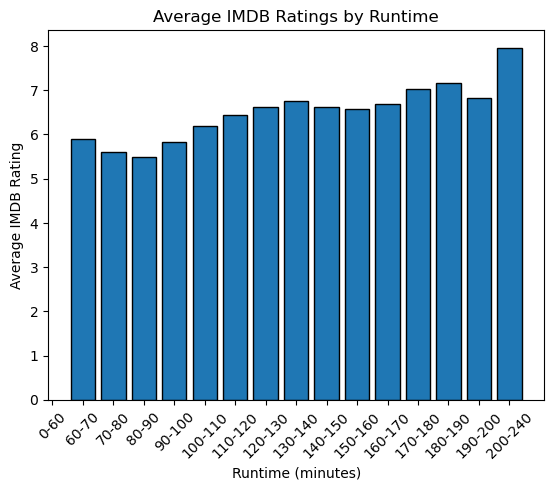

In [6]:
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/3264824112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_180['Runtime Group'] = pd.cut(movie_180['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/3264824112.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = movie_180.groupby('Runtime Group')['imdbRating'].mean()


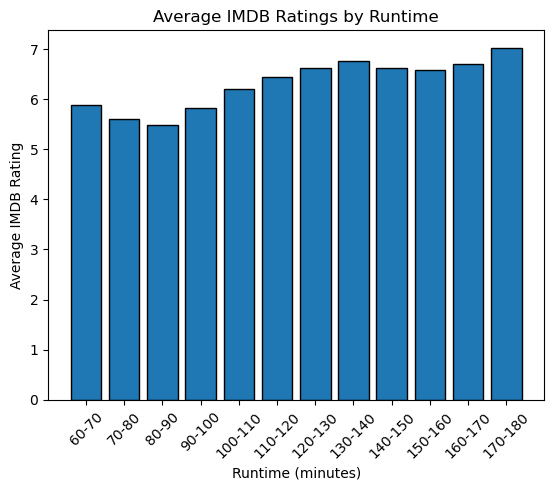

In [48]:
#Establish bins and labels for bins
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
movie_180['Runtime Group'] = pd.cut(movie_180['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = movie_180.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/818640295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/818640295.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


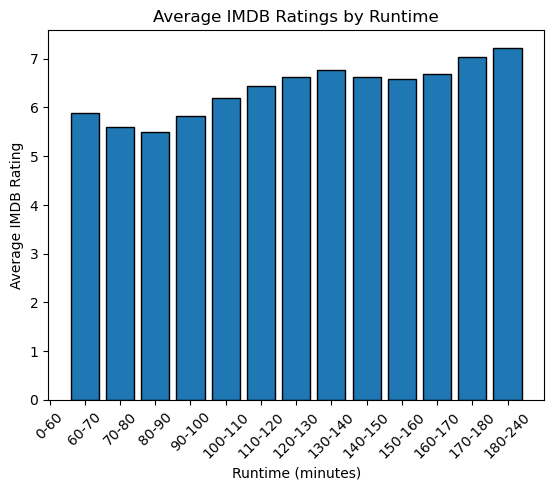

In [7]:
#Establish bins and labels for bins
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/3522306480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_45764/3522306480.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


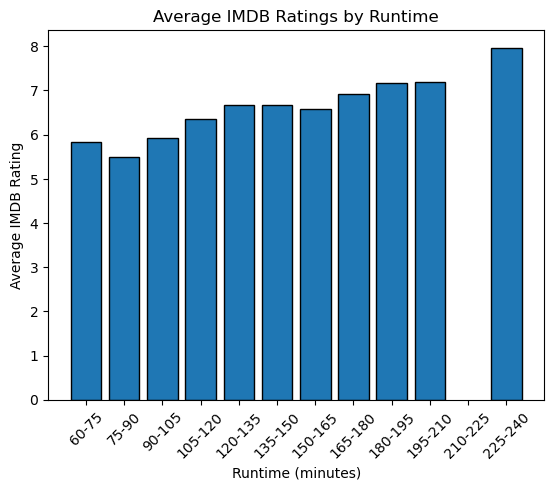

In [8]:
bins = [0, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

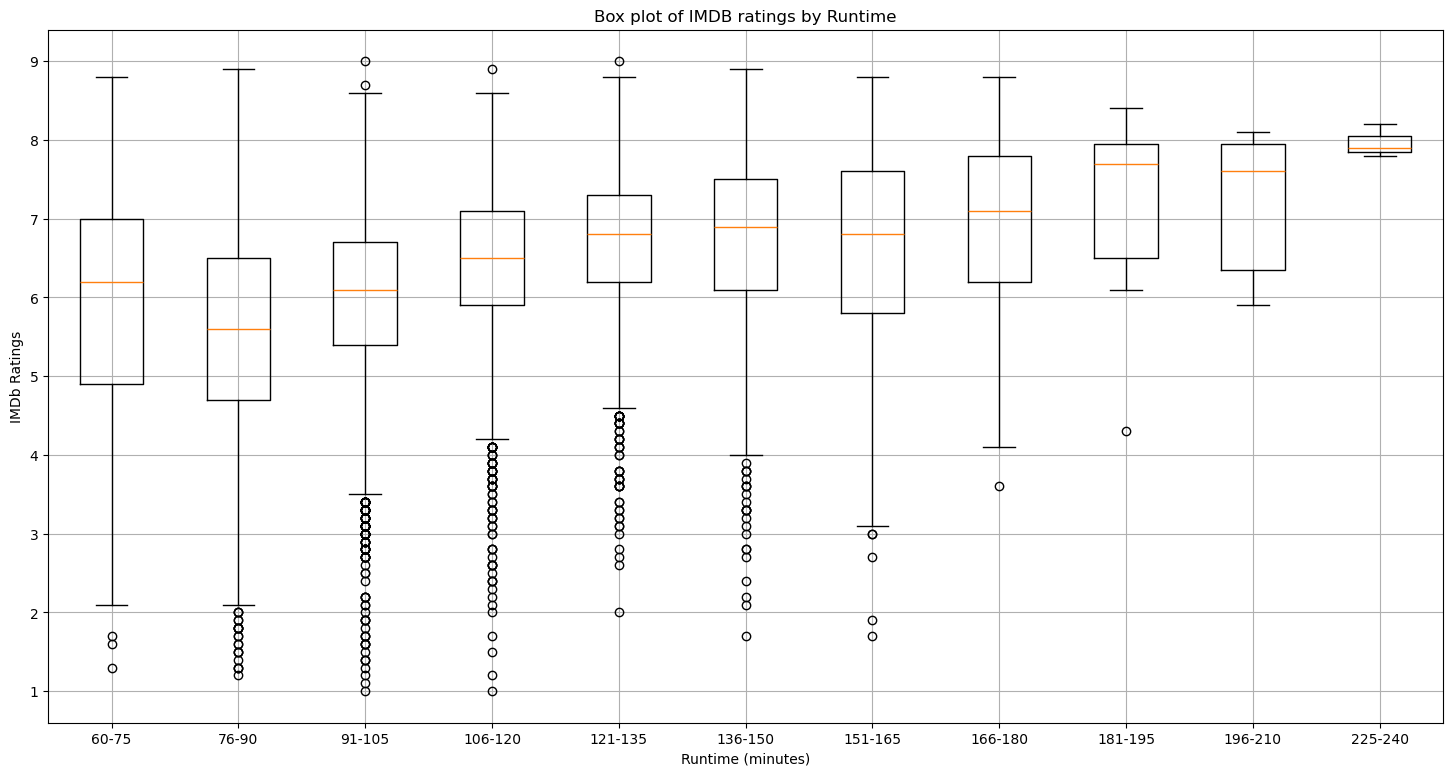

In [31]:
#separate movies into groups by runtime
runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 75)]
runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=76) & (cleaned_movie['Runtime'] <= 90)]
runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 105)]
runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=106) & (cleaned_movie['Runtime']<= 120)]
runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 135)]
runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=136) & (cleaned_movie['Runtime']<= 150)]
runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 165)]
runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=166) & (cleaned_movie['Runtime']<= 180)]
runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 195)]
runtime_9 = cleaned_movie[(cleaned_movie['Runtime'] >=196) & (cleaned_movie['Runtime']<= 210)]
runtime_10 = cleaned_movie[(cleaned_movie['Runtime'] >=225) & (cleaned_movie['Runtime']<= 240)]

#grab IMDB Rating for all movies in each runtime group, drop NaN ratings
group0 = runtime_0['imdbRating'].dropna()
group1 = runtime_1['imdbRating'].dropna()
group2 = runtime_2['imdbRating'].dropna()
group3 = runtime_3['imdbRating'].dropna()
group4 = runtime_4['imdbRating'].dropna()
group5 = runtime_5['imdbRating'].dropna()
group6 = runtime_6['imdbRating'].dropna()
group7 = runtime_7['imdbRating'].dropna()
group8 = runtime_8['imdbRating'].dropna()
group9 = runtime_9['imdbRating'].dropna()
group10 = runtime_10['imdbRating'].dropna()

#put all groups into one list
ratings_groups = [
    group0,
    group1,
    group2,
    group3,
    group4,
    group5,
    group6,
    group7,
    group8,
    group9,
    group10
]
#create boxplot
plt.figure(figsize=(18,9))
plt.boxplot(ratings_groups, labels=[
    '60-75', '76-90', '91-105', '106-120',
    '121-135', '136-150', '151-165', '166-180',
    '181-195', '196-210', '225-240'
])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()


In [37]:
#run ANOVA test at p_value .05
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=153.8600123461102, pvalue=1.0242247074302024e-304)

In [33]:
#separate movies into groups by runtime
alt_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 75)]
alt_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=76) & (cleaned_movie['Runtime'] <= 90)]
alt_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 105)]
alt_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=106) & (cleaned_movie['Runtime']<= 120)]
alt_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 135)]
alt_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=136) & (cleaned_movie['Runtime']<= 150)]
alt_runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 165)]
alt_runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=166) & (cleaned_movie['Runtime']<= 180)]
alt_runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 240)]

#grab IMDB Rating for all movies in each runtime group and drop Non numbers
alt_group0 = alt_runtime_0['imdbRating'].dropna()
alt_group1 = alt_runtime_1['imdbRating'].dropna()
alt_group2 = alt_runtime_2['imdbRating'].dropna()
alt_group3 = alt_runtime_3['imdbRating'].dropna()
alt_group4 = alt_runtime_4['imdbRating'].dropna()
alt_group5 = alt_runtime_5['imdbRating'].dropna()
alt_group6 = alt_runtime_6['imdbRating'].dropna()
alt_group7 = alt_runtime_7['imdbRating'].dropna()
alt_group8 = alt_runtime_8['imdbRating'].dropna()



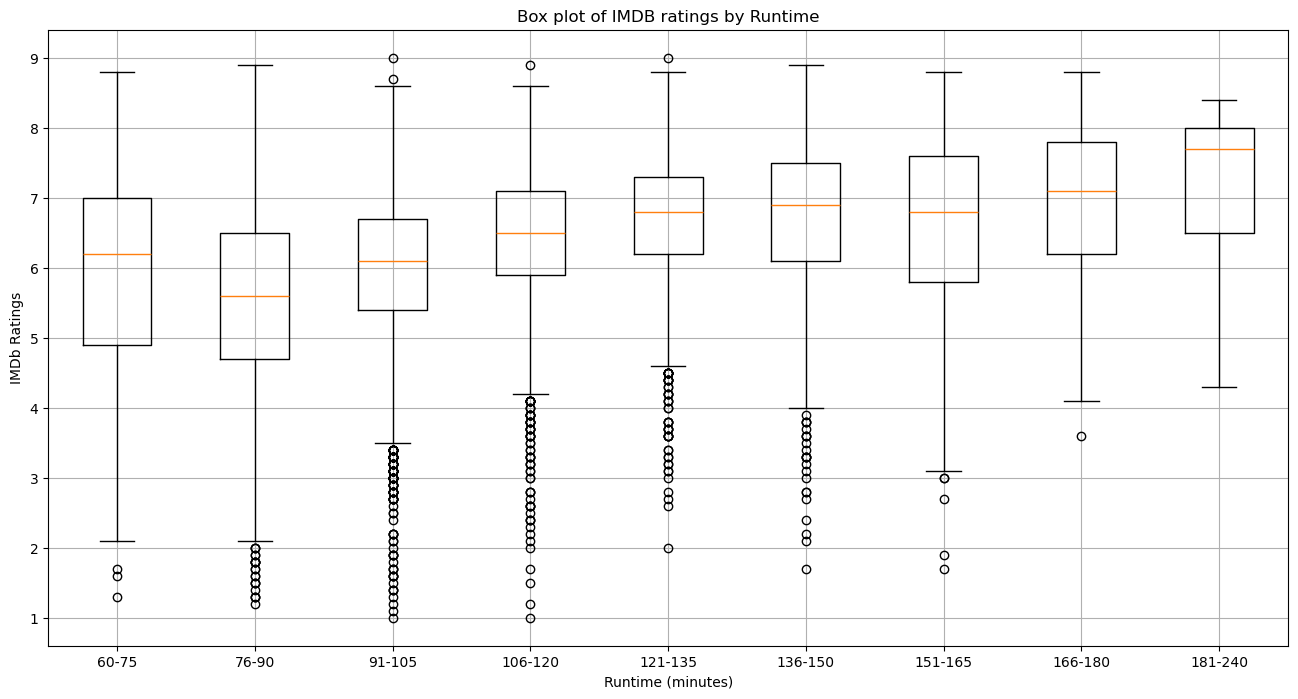

In [34]:
#put all groups into one list
ratings_groups = [
    alt_group0,
    alt_group1,
    alt_group2,
    alt_group3,
    alt_group4,
    alt_group5,
    alt_group6,
    alt_group7,
    alt_group8
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=[
    '60-75', '76-90', '91-105', '106-120',
    '121-135', '136-150', '151-165', '166-180',
    '181-240'
])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()

In [35]:
#run ANOVA test at p_value .05
stats.f_oneway(alt_group0, alt_group1, alt_group2, alt_group3, alt_group4, alt_group5, alt_group6, alt_group7, alt_group8)

F_onewayResult(statistic=192.1842766628, pvalue=9.799095481226186e-307)

In [58]:
#separate movies into groups by 10 minute increments excluding movies longer than 180 minutes
reduced_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 70)]
reduced_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=71) & (cleaned_movie['Runtime'] <= 80)]
reduced_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=81) & (cleaned_movie['Runtime']<= 90)]
reduced_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 100)]
reduced_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=101) & (cleaned_movie['Runtime']<= 110)]
reduced_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=111) & (cleaned_movie['Runtime']<= 120)]
reduced_runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 130)]
reduced_runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=131) & (cleaned_movie['Runtime']<= 140)]
reduced_runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=141) & (cleaned_movie['Runtime']<= 150)]
reduced_runtime_9 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 160)]
reduced_runtime_10 = cleaned_movie[(cleaned_movie['Runtime'] >=161) & (cleaned_movie['Runtime']<= 170)]
reduced_runtime_11 = cleaned_movie[(cleaned_movie['Runtime'] >=171) & (cleaned_movie['Runtime']<= 180)]


#grab IMDB Rating for all movies in each runtime group and drop Non numbers
reduced_group0 = reduced_runtime_0['imdbRating'].dropna()
reduced_group1 = reduced_runtime_1['imdbRating'].dropna()
reduced_group2 = reduced_runtime_2['imdbRating'].dropna()
reduced_group3 = reduced_runtime_3['imdbRating'].dropna()
reduced_group4 = reduced_runtime_4['imdbRating'].dropna()
reduced_group5 = reduced_runtime_5['imdbRating'].dropna()
reduced_group6 = reduced_runtime_6['imdbRating'].dropna()
reduced_group7 = reduced_runtime_7['imdbRating'].dropna()
reduced_group8 = reduced_runtime_8['imdbRating'].dropna()
reduced_group9 = reduced_runtime_9['imdbRating'].dropna()
reduced_group10 = reduced_runtime_10['imdbRating'].dropna()
reduced_group11 = reduced_runtime_11['imdbRating'].dropna()

In [60]:
reduced_runtime_0.count()

Title              64
Year               64
Rated              36
Released           64
Runtime            64
Genre              64
Director           64
Writer             59
Actors             64
Plot               63
Metascore           8
imdbRating         62
Rotten Tomatoes    13
imdbVotes          63
BoxOffice           8
Runtime Group      64
dtype: int64

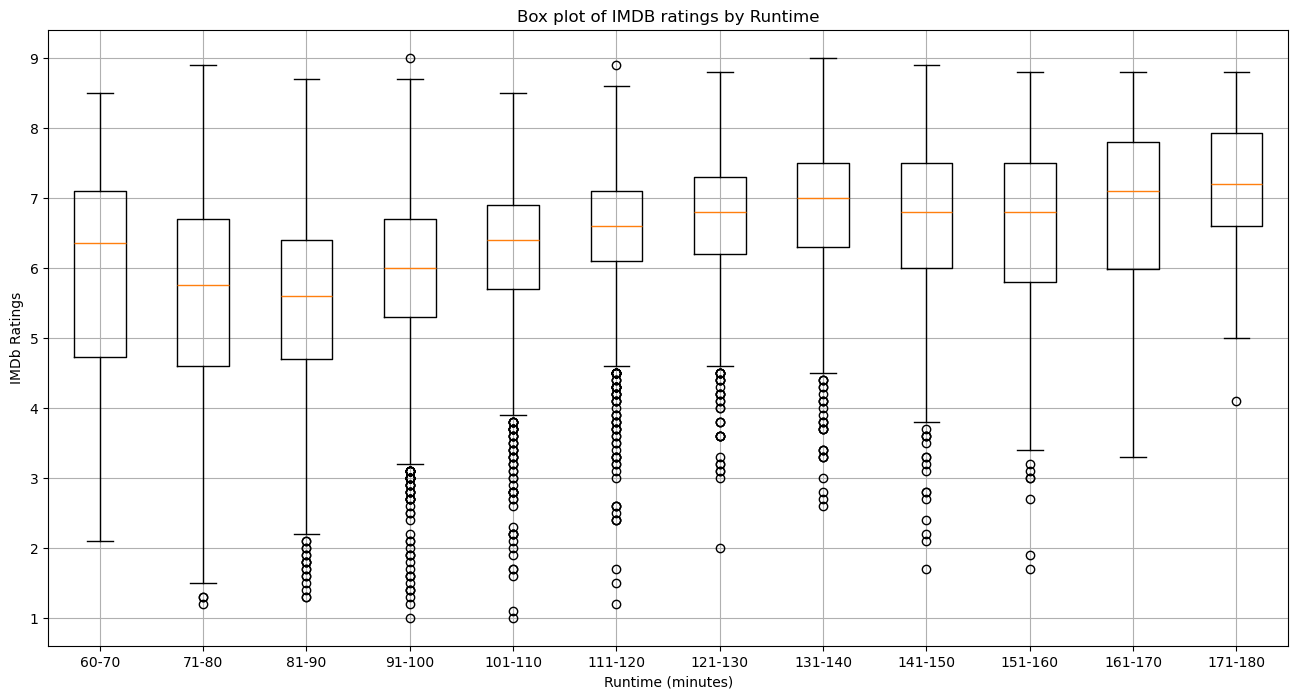

In [39]:
#put all groups into one list
ratings_groups = [
    reduced_group0,
    reduced_group1,
    reduced_group2,
    reduced_group3,
    reduced_group4,
    reduced_group5,
    reduced_group6,
    reduced_group7,
    reduced_group8,
    reduced_group9,
    reduced_group10,
    reduced_group11
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=[
    '60-70', '71-80', '81-90', '91-100',
    '101-110', '111-120', '121-130', '131-140',
    '141-150', '151-160', '161-170', '171-180'
])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()

In [40]:
#run ANOVA test at p_value .05
stats.f_oneway(reduced_group0, reduced_group1, reduced_group2, reduced_group3, reduced_group4, reduced_group5, reduced_group6,
    reduced_group7, reduced_group8, reduced_group9, reduced_group10,reduced_group11)

F_onewayResult(statistic=143.4345385114274, pvalue=4.6663005227817e-311)

In [51]:
reduced_group0.mean()

5.925806451612904

In [53]:
#print mean for each group
print(f'The mean IMDb Rating for movies between 60-70 minutes is {reduced_group0.mean()}')
print(f'The mean IMDb Rating for movies between 71-80 minutes is {reduced_group1.mean()}')
print(f'The mean IMDb Rating for movies between 81-90 minutes is {reduced_group2.mean()}')
print(f'The mean IMDb Rating for movies between 91-100 minutes is {reduced_group3.mean()}')
print(f'The mean IMDb Rating for movies between 101-110 minutes is {reduced_group4.mean()}')
print(f'The mean IMDb Rating for movies between 111-120 minutes is {reduced_group5.mean()}')
print(f'The mean IMDb Rating for movies between 121-130 minutes is {reduced_group6.mean()}')
print(f'The mean IMDb Rating for movies between 131-140 minutes is {reduced_group7.mean()}')
print(f'The mean IMDb Rating for movies between 141-150 minutes is {reduced_group8.mean()}')
print(f'The mean IMDb Rating for movies between 151-160 minutes is {reduced_group9.mean()}')
print(f'The mean IMDb Rating for movies between 161-170 minutes is {reduced_group10.mean()}')
print(f'The mean IMDb Rating for movies between 171-180 minutes is {reduced_group11.mean()}')

The mean IMDb Rating for movies between 60-70 minutes is 5.925806451612904
The mean IMDb Rating for movies between 71-80 minutes is 5.542289719626168
The mean IMDb Rating for movies between 81-90 minutes is 5.524955035971223
The mean IMDb Rating for movies between 91-100 minutes is 5.896470965672121
The mean IMDb Rating for movies between 101-110 minutes is 6.235528120713306
The mean IMDb Rating for movies between 111-120 minutes is 6.489793004996431
The mean IMDb Rating for movies between 121-130 minutes is 6.659431818181817
The mean IMDb Rating for movies between 131-140 minutes is 6.74678747940692
The mean IMDb Rating for movies between 141-150 minutes is 6.618306010928962
The mean IMDb Rating for movies between 151-160 minutes is 6.550922509225091
The mean IMDb Rating for movies between 161-170 minutes is 6.7749999999999995
The mean IMDb Rating for movies between 171-180 minutes is 7.06304347826087


In [42]:
#separate movies into groups by 30 minute increments
thirty_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 90)]
thirty_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime'] <= 120)]
thirty_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 150)]
thirty_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 180)]
thirty_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 210)]
thirty_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=211) & (cleaned_movie['Runtime']<= 240)]


#grab IMDB Rating for all movies in each runtime group and drop Non numbers
thirty_group0 = thirty_runtime_0['imdbRating'].dropna()
thirty_group1 = thirty_runtime_1['imdbRating'].dropna()
thirty_group2 = thirty_runtime_2['imdbRating'].dropna()
thirty_group3 = thirty_runtime_3['imdbRating'].dropna()
thirty_group4 = thirty_runtime_4['imdbRating'].dropna()
thirty_group5 = thirty_runtime_5['imdbRating'].dropna()

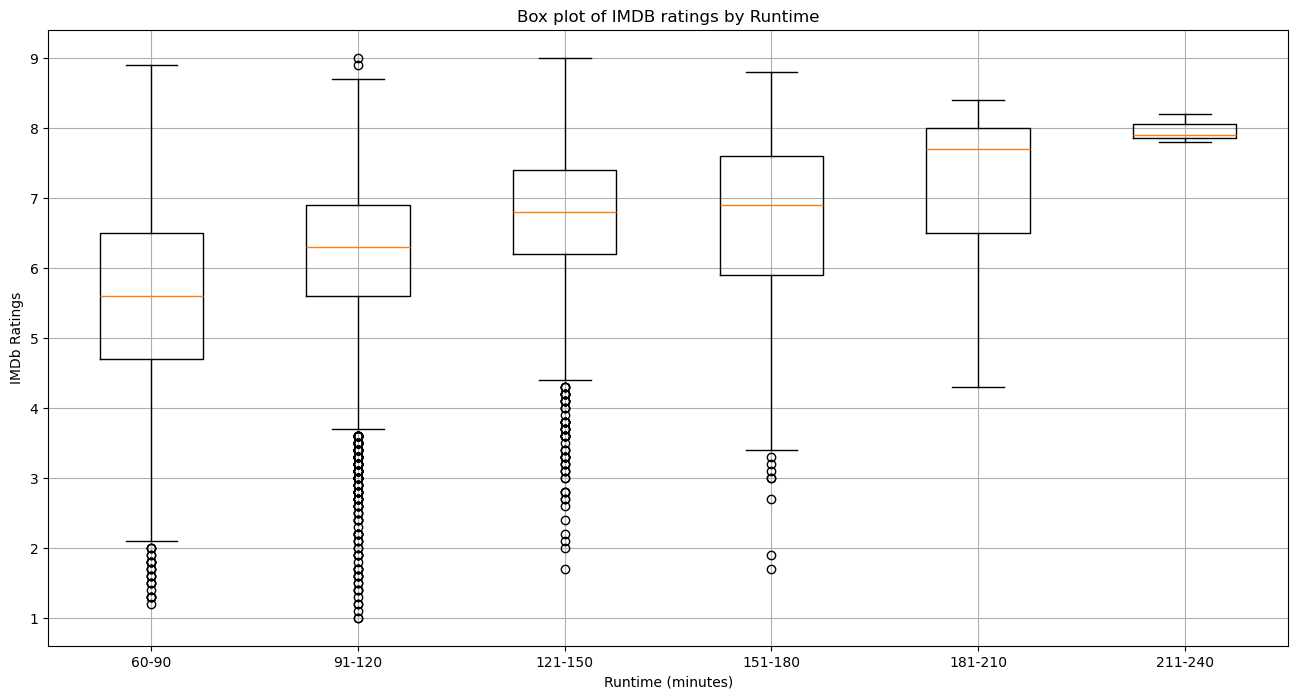

In [49]:
#put all groups into one list
ratings_groups = [
    thirty_group0,
    thirty_group1,
    thirty_group2,
    thirty_group3,
    thirty_group4,
    thirty_group5
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=['60-90', '91-120', '121-150', '151-180',
                                   '181-210', '211-240'])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()